# Assignment #1 

#### Machine Learning in Korea University
#### COSE362, Fall 2018 (Prof. Jaewoo Kang)
#### Due : 11/6 (TUE) 11:59 PM









#### In this assignment, you will learn model selection process among various hyperparameters.
* Implementation detail: Anaconda 5.3 with python 3.7
* Use given dataset. Please do not change training / validation / test split.
* Use numpy, scikit-learn, and matplotlib library

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 1. Linear Regression with Feature Selection
In this example we will conduct featrue selection process in linear regression model. <br>
You will use data in 'LinReg' directory for this example. <br>
Please perform the following steps. 
> 0. Preprocess: Change given dataset into input array for scikit-learn model.
> 1. Feture selection : perform greedy feature selection.
> 2. Plot: plot validation and train error against number of feature.
> 3. Model selection and evaluation: Select best model and perform evaluation on test dataset



### 1-0. Preprocess
Load dataset and process it into appropriate array form.
* Example <br>
> For linear regression problem, the datasets are described onto 'dev_sample.npy', 'dev_label.npy', 'test_sample.npy', 'test_label.npy' in 'LinReg' folder. <br>
> Load these datasets onto <b>X_dev, y_dev, X_test, y_test</b>. <br>
> You may need to use numpy.load function

In [2]:
# Load linear regression datasets
# Your code here
X_dev = np.load('./LinReg/dev_sample.npy')
y_dev = np.load('./LinReg/dev_label.npy')
X_test = np.load('./LinReg/test_sample.npy')
y_test = np.load('./LinReg/test_label.npy')

### 1-1. Feature selection
Build linear regression models with different number of features. (1 ~ 100)<br>
Please use <b>cross validation</b>, <b>greedy approach</b> for feature selection until choose optimal number of features. <br> 

* For cross validaton, you need to split your development set into 5-fold. This is implemented into class <b>cv</b>.
* Feature selection example : Input with 10 features
> Call 10 features as #1, #2, #3, ..., #10 <br>
> First build 10 models with only one feature. 
> Compare model with #1, model with #2, ... , model with #10 <br>
> Choose feature of the best model. (for example, #1 is the best) <br>
> Build model with 2 features. (#1, #2), (#1, #3), ..., (#1, #10). <br>
> Then, add feature with the best performance. <br>
> And so on...

<b>For the next step, please save validation and train error of the best model for each number of selected features.



In [ ]:
# Define linear regression function
# You may use sklearn.linear_model.LinearRegression
# Your code here
lr=LinearRegression()
# End your code

# Basic settings. DO NOT MODIFY
selected_feature = []
sel_num = 100
valid_split = 1/5
cv = ShuffleSplit(n_splits=5, test_size=valid_split, random_state=0)

selected_train_error = []
selected_valid_error = []

# For greedy selection
for sel in range(sel_num) :
    min_train_error = +1000
    min_valid_error = +1000
    min_feature = 0
    
    # For each feature
    for i in range(X_dev.shape[1]) : #i=0~125
        train_error_ith = []
        valid_error_ith = []
        # Select feature greedy
        # Hint : There should be no duplicated feature in selected_feature
        # Your code here
        
        X_dev_fs = [] # define empty array
        X_temp = []
        f_list = selected_feature.copy() # features those are already selected

        if i not in f_list: #pass over if ith one is duplicated feature
            pass
        else:
            continue
        f_list.append(i) # features for testing
        for k in range(len(f_list)):
            f_col = X_dev[:, f_list[k]]
            X_temp.append(f_col)
        
        X_temp = np.asarray(X_temp)
        for m in range((X_temp.shape[1])):
            sample_list = []
            for n in range(X_temp.shape[0]):
                sample_list.append(X_temp[n][m])
            X_dev_fs.append(sample_list)
        
        X_dev_fs = np.asarray(X_dev_fs)
        # End your code
        
        # For cross validation
        for train_index, test_index in cv.split(X_dev) :
            X_train, X_valid = X_dev_fs[train_index], X_dev_fs[test_index]
            y_train, y_valid = y_dev[train_index], y_dev[test_index]

            # Derive training error, validation error
            # You may use sklearn.metrics.mean_squared_error, model.fit(), model.predict()
            # Your code here
            lr_model = lr.fit(X_train, y_train)
            pred_train = lr_model.predict(X_train)
            pred_valid = lr_model.predict(X_valid)
            
            train_error_ith.append(mean_squared_error(pred_train, y_train))
            valid_error_ith.append(mean_squared_error(pred_valid, y_valid))
            # End your code
            
        # Select best performance feature set on each features
        # You should choose the feature which has minimum mean cross validation error
        # Your code here
        if min_train_error > np.min(train_error_ith):
            min_train_error = np.min(train_error_ith)
        if min_valid_error > np.min(valid_error_ith):
            min_valid_error = np.min(valid_error_ith)
            min_feature = i
        # End your code

    print('='*50)
    print("# of selected feature(s) : {}".format(sel+1))
    print("Selected feature of this iteration : {}".format(min_feature))
    selected_feature.append(min_feature)
    selected_train_error.append(min_train_error)
    selected_valid_error.append(min_valid_error)

# of selected feature(s) : 1
Selected feature of this iteration : 1
# of selected feature(s) : 2
Selected feature of this iteration : 3
# of selected feature(s) : 3
Selected feature of this iteration : 45
# of selected feature(s) : 4
Selected feature of this iteration : 109
# of selected feature(s) : 5
Selected feature of this iteration : 53
# of selected feature(s) : 6
Selected feature of this iteration : 43
# of selected feature(s) : 7
Selected feature of this iteration : 21
# of selected feature(s) : 8
Selected feature of this iteration : 95
# of selected feature(s) : 9
Selected feature of this iteration : 116
# of selected feature(s) : 10
Selected feature of this iteration : 79
# of selected feature(s) : 11
Selected feature of this iteration : 15
# of selected feature(s) : 12
Selected feature of this iteration : 22
# of selected feature(s) : 13
Selected feature of this iteration : 30
# of selected feature(s) : 14
Selected feature of this iteration : 46
# of selected feature(s) : 15

### 1-2. Plot error
Plot train and validation error against number of features.<br>
After plotting, <b>analyze the result graph.

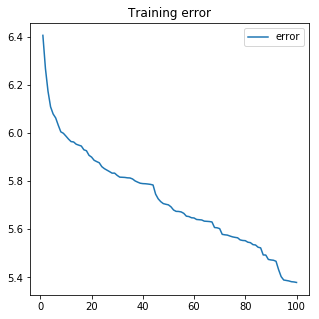

In [4]:
# Train error plot
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,sel_num+1), selected_train_error)
plt.title('Training error')
plt.legend(['error'])
plt.show()

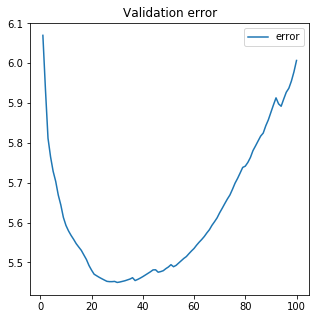

In [5]:
# Validation error plot
plt.figure(figsize=(5,5))
plt.plot(np.arange(1,sel_num+1), selected_valid_error)
plt.title('Validation error')
plt.legend(['error'])
plt.show()

### Analyze
Write explanation of graph below. <br>
Analyze the folloing points.
* Trend of each error against number of features
* Meaning of gap between vlidation error and train error
* Meaning of each region in graph
* Others...

#### Write description here
training error는 사용하는 feature가 많아질수록 감소하고 <br>
validation error는 일정 수준 감소하다가 다시 증가한다. <br><br>

training error와 validation error의 두 그래프를 비교해보면 overfitting 인지 underfitting인지 알 수 있는데, <br>
training error와 validation error의 갭이 작고 두개 모두 값이 크면 underfitting, <br>
training error의 값은 작은데 validation error의 값은 크게 나타나서 갭이 크면 overfitting이다. <br>
training error와 validation error의 값이 비슷하게 작은 상태가 가장 이상적인 상태이다. (validation error가 minimum일 때) <br><br>

validation error가 minimum인 점을 기준으로<br>
왼편은 high bias, 오른편은 high variance이다.

### 1-3. Model selection and evaluation
Select the best model and perform a test on test dataset.<br>
Print the <b>performance on test set</b> with <b>features of the best model.

In [6]:
# Select optimal feature set corresponding the minimum cross validation error
# Your code here
optimal_idx = np.argmin(selected_valid_error)
selected_feature = selected_feature[0:optimal_idx+1]

X_dev_fs = []
X_temp = []
    
for k in range(len(selected_feature)):
    f_col = X_dev[:, selected_feature[k]]
    X_temp.append(f_col)
        
X_temp = np.asarray(X_temp)
for m in range((X_temp.shape[1])):
    sample_list = []
    for n in range(X_temp.shape[0]):
        sample_list.append(X_temp[n][m])
    X_dev_fs.append(sample_list)
        
X_dev_fs = np.asarray(X_dev_fs)
# End your code

# Basic settings. DO NOT MODIFY
min_train_error = 1000
min_valid_error = 1000
optimal_param = np.array([])

for train_index, test_index in cv.split(X_dev) :
    X_train, X_valid = X_dev_fs[train_index], X_dev_fs[test_index]
    y_train, y_valid = y_dev[train_index], y_dev[test_index]
    
    # Derive training error, validation error for each fold
    # For each fold, you need to compare error with previous minimum error.
    # Your code here
    lr_model = lr.fit(X_train, y_train)
    pred_train = lr_model.predict(X_train)
    pred_valid = lr_model.predict(X_valid)
    
    train_error = mean_squared_error(pred_train, y_train)
    valid_error = mean_squared_error(pred_valid, y_valid)
    
    if min_train_error > train_error:
        min_train_error = train_error
    if min_valid_error > valid_error:
        min_valid_error = valid_error
        optimal_model = lr.fit(X_train, y_train)
    # End your code

# Find the best model on each fold
# Derive test error with best performance model
# Your code here
X_test_fs = []
X_test_temp = []
    
for k in range(len(selected_feature)):
    f_col = X_test[:, selected_feature[k]]
    X_test_temp.append(f_col)
        
X_test_temp = np.asarray(X_test_temp)
for m in range((X_test_temp.shape[1])):
    sample_list = []
    for n in range(X_test_temp.shape[0]):
        sample_list.append(X_test_temp[n][m])
    X_test_fs.append(sample_list)
        
X_test_fs = np.asarray(X_test_fs)

pred_test = optimal_model.predict(X_test_fs)
test_error = mean_squared_error(pred_test, y_test)
# End your code

# Drop features of final model
print("Results")
print("# of selected features : {}".format(len(selected_feature)))
print("Selected features : ")
print(selected_feature)

# Drop test error and accuracy
print("Training error : {}".format(min_train_error))
print("Validation error : {}".format(min_valid_error))
print("Test error : {}".format(test_error))

Results
# of selected features : 30
Selected features : 
[1, 3, 45, 109, 53, 44, 43, 116, 95, 21, 77, 80, 97, 26, 24, 36, 40, 117, 92, 84, 110, 98, 15, 6, 118, 85, 113, 0, 69, 99]
Training error : 5.707160062659024
Validation error : 4.522828368608584
Test error : 7.679010560715302


## 2. Logistic Regression with Regularizer

In this example you will explore the effect of regularization parameter.<br>
You will use <b>'Heart Disease Dataset'</b> in <b>'LogReg'</b> for this example. <br>

The goal is to predict the presence of heart disease given attributes of a patient.<br>
The presence is integer valued from 0 (no presence) to 4, but you have to only distingush presensence (values 1,2,3,4) from absence (value 0). <br>
Each attribute is described below. <br>

> 1. age : age in years <br>
> 2. sex : sex (1 = male; 0 = female) <br>
> 3. cp : chest pain type <br>
-- Value 1: typical angina <br>
-- Value 2: atypical angina <br>
-- Value 3: non-anginal pain <br>
-- Value 4: asymptomatic  <br>
> 4. trestbps : resting blood pressure (in mm Hg on admission to the hospital)  <br>
> 5. chol : serum cholestoral in mg/dl  <br>
> 6. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
> 7. restecg  : resting electrocardiographic results <br>
-- Value 0: normal <br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
> 8. thalach : maximum heart rate achieved <br>
> 9. exang : exercise induced angina (1 = yes; 0 = no) <br>
> 10. oldpeak : ST depression induced by exercise relative to rest <br>
> 11. slope : the slope of the peak exercise ST segment <br>
-- Value 1: upsloping <br>
-- Value 2: flat <br>
-- Value 3: downsloping  <br>
> 12. ca : number of major vessels (0-3) colored by flourosopy  <br>
> 13. thal : 3 = normal; 6 = fixed defect; 7 = reversable defect  <br>


### 2-0. Preprocess

Firstly, read training, validation and test datasets respectively. <br>


In [2]:

def read_data(data_type):
    f = open('./LogReg/' + data_type + '.data', 'r')

    X, Y = [],[]
    while True:
        line = f.readline()
        if not line: break
        spl = line.split(',')
        x = spl[:-1]
        y = int(spl[-1])
        
        X.append(list(map(float, x)))
        
        # Define the variable 'binary_label'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  .
        # Note that labels must be 1 or 0.
        # Your code here
        if y == 0:
            binary_label = 0
        else:
            binary_label = 1
        
        Y.append(binary_label)  # blank
    
    return X, Y

X_tr, Y_tr = read_data('train')
X_va, Y_va = read_data('valid')
X_te, Y_te = read_data('test')


### Normalization and Converting to one-hot vector

Data preprocessing takes several steps after loading data. <br>
1. <b>Normailze</b> numerical values. Normalization is defined as <b><i>normalized_value</i> = (value - mean) / std</b>. <br>
   You should calculate mean and standard deviation (std) on <b> train data </b> and normalize train, valid and test data.
2. For categorical attributes, <b>build dictionaries</b> of each attribute and convert the categorical values to <b>one-hot vectors</b>. <br>
3. Concatenate all the obtained values. <br>

If you have done correctly, you will get results that are same format as below: 
* <b>before</b> : [63.0, 1.0, 1.0, 145.0, 233.0, 1.0, 2.0, 150.0, 0.0, 2.3, 3.0, 0.0, 6.0]
* <b>after</b> : [0.11099784710934087, 0, 1, 1, 0, 0, 0, 0.035386000081823056, -0.005256085700922788, 0, 1, 0, 0, 1, 0.0026598418293161848, 1, 0, 0.6659671864819814, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0] <br>
(The values in the above example can be different from actual values.)<br>

<b>Do not use any library such as sklearn.preprocessing. You can use only Numpy. </b><br>


In [8]:

# Your code here
mean_list = []
std_list = []

num_attr = [0,3,4,7,9]
cat_attr = [1,2,5,6,8,10,11,12]

def convert(X_list):
    # make mean & std list of numerical attributes
    for i in range(len(X_list[0])): # number of attribute = 13
        if i not in num_attr:
            mean_list.append(-1)
            std_list.append(-1)
            continue
        else:
            pass
        attr_list = []
        for j in range(len(X_list)): # number of sample = 118
            attr_list.append(X_list[j][i])
        mean_list.append(np.mean(attr_list))
        std_list.append(np.std(attr_list))
    
    # make dictionary of categorical attributes
    dic2 = {1.0: [0,1], 0.0: [1,0]}
    dic3 = {1.0: [1,0,0,0], 2.0: [0,1,0,0], 3.0: [0,0,1,0], 4.0: [0,0,0,1]}
    dic6 = {1.0: [0,1], 0.0: [1,0]}
    dic7 = {0.0: [1,0,0], 1.0: [0,1,0], 2.0: [0,0,1]}
    dic9 = {1.0: [0,1], 0.0: [1,0]}
    dic11 = {1.0: [1,0,0], 2.0: [0,1,0], 3.0: [0,0,1]}
    dic12 = {0.0: [1,0,0,0], 1.0: [0,1,0,0], 2.0: [0,0,1,0], 3.0: [0,0,0,1]}
    dic13 = {3.0: [1,0,0], 6.0: [0,1,0], 7.0: [0,0,1]}

    cat_dic = {1:dic2, 2:dic3, 5:dic6, 6:dic7, 8:dic9, 10:dic11, 11:dic12, 12:dic13}

    converted_X_list = []
    for i in range(len(X_list)):
        converted_row = []
        for j in range(len(X_list[0])):
            if j in num_attr:
                converted_row.append((X_list[i][j] - mean_list[j]) / std_list[j])
            else:
                converted_row = converted_row + cat_dic[j][X_list[i][j]]
        converted_X_list.append(converted_row)
    
    return converted_X_list

converted_tr = convert(X_tr)
converted_va = convert(X_va)
converted_te = convert(X_te)

print(converted_tr[53])
print(converted_tr[117])

converted_tr = np.asarray(converted_tr)
print(converted_tr[53])
print(converted_tr[117])
type(converted_tr)
converted_tr
# End your code

[0.831249403246673, 1, 0, 0, 0, 0, 1, -0.4577077444521834, -0.7265827532507144, 1, 0, 1, 0, 0, 0.6147522746311291, 1, 0, -0.8976077290840021, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
[0.24600221003004147, 1, 0, 0, 0, 0, 1, 0.396197612786674, -0.14034846344842877, 1, 0, 1, 0, 0, -1.084094760649275, 0, 1, -0.7441037986029699, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
[ 0.8312494   1.          0.          0.          0.          0.
  1.         -0.45770774 -0.72658275  1.          0.          1.
  0.          0.          0.61475227  1.          0.         -0.89760773
  1.          0.          0.          1.          0.          0.
  0.          1.          0.          0.        ]
[ 0.24600221  1.          0.          0.          0.          0.
  1.          0.39619761 -0.14034846  1.          0.          1.
  0.          0.         -1.08409476  0.          1.         -0.7441038
  0.          1.          0.          1.          0.          0.
  0.          0.          0.          1.        ]


array([[ 0.94829884,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.4164966 ,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.4164966 ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.36305165,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.62678881,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.24600221,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

### 2-1. Logistic regression model and regularizer
Build logistic regression model with l2 regularization utilizing sklearn. <br>
Find the optimal coefficient based on <b>cross entropy loss</b> on thet validation set. <br>
Try following regularization parameter settings.
* Regularization parameters = 0.01, 0.05, 0.1, 0.5, 1, 10, 100 <br>
* Note that regluarization parameter for LogisticRegression in sklearn is inverse of true parameter. <br>
  (coef = 0.001 for LogisticRegression   =>  $\lambda$ = 1000 in our course note)
* Your model should be <b>LogisticRegression(C=coef, solver='lbfgs', max_iter=500). </b>
  <br>  <b>Do not change the model setting except C. </b> 
  <br> (coef = each regularization parameter)

In [6]:
# Please use below function
# logreg = LogisticRegression(C=coef, solver='lbfgs', max_iter=500)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

coefs = [0.01, 0.05, 0.1, 0.5, 1, 10, 100]

opt_coef = 1


# To plot losses on training and validation sets with varied parameter settings, 
# save them on lists.
loss_tr, loss_va = [],[]

# Your code here

for i in range(len(coefs)):
    clf = LogisticRegression(C=coefs[i], solver='lbfgs', max_iter=500).fit(converted_tr, Y_tr)
    
    pred_tr = clf.predict(converted_tr)
    pred_va = clf.predict(converted_va)
    
    loss_tr.append(log_loss(pred_tr, Y_tr))
    loss_va.append(log_loss(pred_va, Y_va))

# End your code

loss_va


[7.373554456993993,
 5.821240915678567,
 5.433155792169119,
 5.433164776409907,
 5.045079652900459,
 5.433173760650696,
 5.433173760650696]

### 2-2. Plot error
Plot the train and validation loss against given regularization parameter <b>(not inverse)</b>.<br>
<b> Analyze the result.

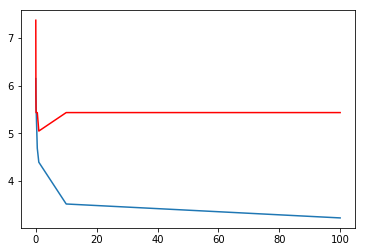

In [7]:
# Do not fix the code!!

plt.plot(coefs, loss_tr, coefs, loss_va, 'r-')
plt.show()

### Analyze 
Write explanation of graph below.

+ coef값은 실제 regularization parameter λ의 inverse값이므로 0.01, 0.05, 0.1, 0.5, 1, 10, 100은 각각 λ값 100, 20, 10, 2, 1, 0,1 0,01을 의미한다.
+ coef값이 커질수록 λ값이 작아질수록 regularization을 약하게 하는 것을 의미한다.
+ 가장 큰 λ값을 적용한 제일 왼쪽이 regularization을 강하게 적용한 모델의 loss를 나타낸다.
<br><br>

+ regularization을 강하게 적용할수록 (λ값이 클수록) attribute의 영향력이 낮아져 단순한 모델이 나온다.
+ 반대로 λ값이 작다면 attribute value의 영향력이 높은, 학습 데이터에 더 강하게 fitting된 복잡한 모델이 나온다.
<br><br>

그래프를 오른쪽에서 왼쪽으로 λ값이 작은 경우부터 큰 경우까지 차례대로 본다면
+ training loss는 점점 커진다.
+ validation loss는 점점 줄어들다가 다시 증가한다.
+ validation loss의 최저점을 기준으로 오른편으로 갈수록 일반화가 덜 된 모델이라고 볼 수 있고 overfitting(high variance)상태이기 때문에 training loss는 작은 반면 validation loss는 크다.
+ 왼편으로 갈수록 단순화된 모델이라고 볼 수 있고, underfitting(high bias)상태이기 때문에 training loss와 validation loss가 모두 크게 나타난다.

### 2-3. Model selection and evaluation

Drop the performance on test set with the regularization coefficient of the best model.

In [8]:

# Your code here
optimal_idx = np.argmin(loss_va)
coef = coefs[optimal_idx]

clf = LogisticRegression(C=coef, solver='lbfgs', max_iter=500).fit(converted_tr, Y_tr)
pred_te = clf.predict(converted_te)
test_loss = log_loss(pred_tr, Y_tr)
test_acc = clf.score(converted_te, Y_te)
# End your code


#print regularization paramter of final model and drop test loss and accuracy
print ("Optimal : {}, Loss : {:2.3f}, Accuracy : {:3.2f}".format(coef, test_loss, test_acc*100))

Optimal : 1, Loss : 3.220, Accuracy : 83.33
